# READ THESE INSTRUCTIONS CAREFULLY AND IN FULL BEFORE YOU PROCEED TO WORK!

### CONTEXT :  Investigation of the nature of stellar explosions

10 stars explode every second in the sky, most of them unseen as they are too far for their light to reach us. When they do, we can measure the property of the explosion and we find that there is a diversity of properties. Through the study of their spectra, we can measure the chemical composition of the progenitor star and the energy released in the explosion. We will focus here on 3 types of stellar explosions, or Supernovae (shortened to SN, for the singular, SNe for the plural). SNe Ic, SNe Ic-BL (which stands for "broad-lined", describing the broad quality of their spectral features), and SNe Ic-BL accompanied by a Gamma Ray Burst (GRB) which is an emission at higher electromagnetic frequencies (gamma rays). The details of this taxonomy are not important at this point (you can read about them [here](https://ned.ipac.caltech.edu/level5/March03/Filippenko/frames.html) if you wish), but suffice to say that these explosions have increasing energy release Ic < Ic-BL < Ic-BLGRB.

We do not know why the energy released is different in spite of similar observed chemical properties. In a recent paper, we asked if the *environment* in which they explode is the same: the environment from an astrophysical perspective means the chemical environment of the region of the Galaxy where the explosion happens, which we measure relative to the chemical environment near our Sun: the *Metallicity*.




In the files below, we report the metallicity measured in several ways for the environment of several stellar explosions. 

***Focusing on the metallicity measured as "KD02comb" find a statistical answer to the question: do the three kinds of explosions, SN Ic, SN Ic-BL, SN Ic-BLGRB, come from the same distribution of chemical properties?***


Note: "KD02comb" stands for [Kewely and Dopite 2012](https://www2.scopus.com/record/display.uri?eid=2-s2.0-0013467486&origin=inward&txGid=fcab97eb7a9f1602e0512094f61c91ed), combined scale

# Objective: assessing differences in the chemical environment of stellar explosion

PLEASE SEE THE HINTS TO EACH TASK [here](https://docs.google.com/document/d/1V9PVb6tK0yuCSTyCILkKXZD9--5PVIvhKDPZIiREdtQ/edit?usp=sharing) (no points loss for hints!)

You will receive points for each of the marked deliverables, *and for your discussion of your findings*. 

## 1-6 are the data wrangling portion of the exercise, and are worth up to 60% of the points
*In the data wrangling portion points are awarded for data processed so that they support the analysis in parts 7-11. This portion is likely going to be the most time consuming.*

## 7-11 are the analysis portion of the exercise (including exploratory and visual analysis), and are worth up to 50% of the points 
*In the data analysis portion points are awarded for correct analysis, conclusions supported by the analysis* ***and expressed in full sentences***, *and plots that support the analysis and conclusions.*

*That sums up to 110%, but the maximum grade is reached at 100%. This means you have a better chance to get 100% on your test, and if you exceed 100% the rest will be accounted for as extra credit and help your cumulative score at the end of the semester.*

## Data Wrangling (each task is 10% of the points)
    1. Read in the data for SN metallicity

    2. Read in the GRB metallicity file
    
    3. Read in the classification of Ic and Ic-BL explosions 
    
    4. Merge the metallicity and classification files
    
    5. Define the 3 samples GRB, IcBL, and Ic
    
    6. Create a second "abridged" GRB sample by removing uncertain classifications


## Analysis (visual and quantitative)

    7. Plot the distribution of metallicities (KD02comb) for each of the (4) samples
    
    8. Calculate the mean metallicity for each of the samples  and its uncertainty
    
    9. Compare the distribution of Ic with that of IcBL
   
    10. Compare the distribution of SNe Ic with that of GRBs and that of SNe IcBL with GRBs using, in both cases, the full GRB sample.
    
    11. Repeat the comparison of SNe IcBL with GRBs using now the abridged GRB sample
    
**Extra Credit**. The metallicity measurements include uncertainties which are asymmetric. Do you think these are included in the analysis I outlined above? if not, how would you incorporate these uncertainty in your analysis? (Describe what you would do and, of course, if you have time include this step in the analysis.)"

    
     



### DATA WRANGLING

# 1 Read in the SN metallicity file

You can find the data in the github repository 

https://github.com/fedhere/DSPS/tree/master/midterm

Clean your dataset removing all the columns you will not need in the analysis and all invalid values in the resulting dataframe 
_the deliverable is a table like the one below_


[hints](https://docs.google.com/document/d/1V9PVb6tK0yuCSTyCILkKXZD9--5PVIvhKDPZIiREdtQ/edit#heading=h.wqv9503ir8mr)

You can find the solution at this URL: http://fbb.space/dsps/sne_clean.csv - if you use this solution you will not get the 10 points for this deliverable (but you can take the shortcut now and go back later to this! and if you do get the solution later you will get the points!)


In [1]:
#delete
import numpy as np
import pandas as pd
%pylab inline
url = 'https://raw.githubusercontent.com/fedhere/DSPSsolutions/'
url += 'master/midterm/sne_metallicities.tsv?token=AAM6JBV6WSWVIUM2KWVWLG25UVNQO'
sne =pd.read_csv(url, sep='\t', 
            skiprows=1, index_col=None, header=None, 
                 na_values=['-'],
            names=["SN", "D31", "D13m", "D13p", "KD02comb", 
                   "KD02m", "KD02p", "PP04", "PP04m", 
                   "PP04p", "M08", "M08m", "M08p", 
                   "Emv", "mvm", "mvp", "M13", "M13m", "M13p"])
sne.head()


Populating the interactive namespace from numpy and matplotlib


,SN,D31,D13m,D13p,KD02comb,KD02m,KD02p,PP04,PP04m,PP04p,M08,M08m,M08p,Emv,mvm,mvp,M13,M13m,M13p
0,09ps,8.309,0.088,0.073,8.347,0.131,0.116,8.362,0.025,0.026,8.472,0.050,0.042,0.292,0.078,0.083,8.287,0.016,0.017
1,10bip,8.378,0.050,0.042,NaN,NaN,NaN,8.302,0.013,0.013,8.580,0.027,0.027,0.504,0.061,0.065,8.246,0.010,0.009
2,10gvb,7.945,0.231,0.191,8.280,0.135,0.129,8.102,0.062,0.045,8.161,0.185,0.118,0.329,0.058,0.061,8.175,0.008,0.009
3,10svt,8.296,0.079,0.070,8.479,0.061,0.049,8.218,0.016,0.015,8.331,0.042,0.037,0.032,0.020,0.021,8.191,0.013,0.012
4,12gzk,8.048,0.091,0.072,7.943,0.053,0.046,8.071,0.017,0.015,7.941,0.052,0.046,0.081,0.022,0.022,NaN,NaN,NaN


In [0]:
#delete
sne.drop(["D31", "D13m", "D13p", "KD02m", "KD02p", "PP04", "PP04m", 
                   "PP04p", "M08", "M08m", "M08p", 
                   "Emv", "mvm", "mvp", "M13", "M13m", "M13p"], 
         axis=1, inplace=True)
sne.dropna(inplace=True)


In [3]:
sne.head()

,SN,KD02comb
0,09ps,8.347
2,10gvb,8.280
3,10svt,8.479
4,12gzk,7.943
5,12hni,8.457


In [0]:
#delete
sne.to_csv("sne_clean.csv", index=False)

# 2.  Read in the GRB metallicity file

You can find the data in the github repository 

https://github.com/fedhere/DSPS/tree/master/midterm

Clean your dataset of all the columns you will not need and all invalid values in the remaining dataframe 
_the deliverable is a table like the one below_

[hints](https://docs.google.com/document/d/1V9PVb6tK0yuCSTyCILkKXZD9--5PVIvhKDPZIiREdtQ/edit#heading=h.wqv9503ir8mr)

You can find the solution at http://fbb.space/dsps/grb_clean.csv - if you use this solution you will not get the 10 points for this deliverable (but you can go back later to this! and if you do get the solution later you will get the points!)


In [6]:
#delete
url = 'https://raw.githubusercontent.com/fedhere/DSPSsolutions/master/midterm/grb_metallicities.tsv?token=AAM6JBWD5SD2BZ4C47ZG6PK5UVYLG'
grb = pd.read_csv(url, sep='\t', 
            skiprows=1, header=None,   na_values=['-'],
            names=["SN", "D31", "D13m", "D13p", "KD02comb", 
                   "KD02m", "KD02p", "PP04", "PP04m", 
                   "PP04p", "M08", "M08m", "M08p", 
                   "Emv", "mvm", "mvp", "M13", "M13m", "M13p"])
grb.head()

,SN,D31,D13m,D13p,KD02comb,KD02m,KD02p,PP04,PP04m,PP04p,M08,M08m,M08p,Emv,mvm,mvp,M13,M13m,M13p
0,GRB980425/SN1998bw,8.320,0.072,0.066,8.485,0.049,0.068,8.329,0.025,0.024,8.550,0.049,0.046,0.743,0.150,0.143,8.265,0.017,0.016
1,XRF020903,8.007,0.111,0.083,8.183,0.045,0.252,8.016,0.019,0.018,8.068,0.058,0.049,0.059,0.035,0.035,NaN,NaN,NaN
2,GRB030329/SN2003dh,7.485,0.051,0.081,8.073,0.018,0.019,7.927,0.091,0.057,7.584,0.210,0.183,0.100,0.019,0.018,NaN,NaN,NaN
3,GRB031203/SN2003lw,NaN,NaN,NaN,8.647,0.082,0.069,8.066,0.016,0.017,8.282,0.037,0.038,0.347,0.098,0.097,NaN,NaN,NaN
4,GRB/XRF060218/SN2006aj,8.357,0.020,0.021,8.125,0.006,0.007,8.125,0.004,0.004,8.194,0.011,0.011,0.000,0.000,0.007,NaN,NaN,NaN


In [0]:
#delete
grb.drop(["D31", "D13m", "D13p", "KD02m", "KD02p", "PP04", "PP04m", 
                   "PP04p", "M08", "M08m", "M08p", 
                   "Emv", "mvm", "mvp", "M13", "M13m", "M13p"], 
         axis=1, inplace=True)
grb.dropna(inplace=True)


In [8]:
grb.head()

,SN,KD02comb
0,GRB980425/SN1998bw,8.485
1,XRF020903,8.183
2,GRB030329/SN2003dh,8.073
3,GRB031203/SN2003lw,8.647
4,GRB/XRF060218/SN2006aj,8.125


In [0]:
#delete
grb.to_csv("grb_clean.csv", index=False)

In [12]:
#using solution
grb = pd.read_csv("http://fbb.space/dsps/grb_clean.csv")
sne = pd.read_csv("http://fbb.space/dsps/sne_clean.csv")
grb.head()

,SN,KD02comb
0,GRB980425/SN1998bw,8.485
1,XRF020903,8.183
2,GRB030329/SN2003dh,8.073
3,GRB031203/SN2003lw,8.647
4,GRB/XRF060218/SN2006aj,8.125


In [13]:
#leave
sne.shape

(47, 2)

In [14]:
#leave
grb.shape

(11, 2)

# 3 Read in the classification of Ic and Ic-BL explosions and process it to extract the SN name

Modify the SN name column to be consistent with the name column in the SNe file 

[hint](https://docs.google.com/document/d/1V9PVb6tK0yuCSTyCILkKXZD9--5PVIvhKDPZIiREdtQ/edit#heading=h.isi30wsuhrhc)

You can get the solution at http://fbb.space/dsps/SNtype.csv


In [15]:
#delete
url = "https://raw.githubusercontent.com/fedhere/DSPSsolutions/master/midterm/SNinfo_072617.txt?token=AAM6JBXKVRPFERVSIFB73U25UVROI"
SNtypes = pd.read_csv(url, skiprows=4, 
            delim_whitespace=True, 
              header=None, index_col=0,
           names=['galnum', 'PTFname_region', 'SNtype'])
SNtypes.head()

,PTFname_region,SNtype
galnum,,
1,PTF10xem-host-SNsite,Ic-BL
2,PTF10wal-host-SNsite,Ic
3,PTF09iqd-host-HII3,Ic
4,PTF10xik-host-SNsite,Ic
5,PTF10ood-host-SNsite,Ic


In [0]:
#delete
SNtypes["name"] = SNtypes["PTFname_region"].apply(lambda x:
                x.replace("PTF", "").split("-")[0])
SNtypes.drop("PTFname_region", axis=1, inplace=True)
SNtypes.to_csv("SNtype.csv")

In [17]:
SNtypes.head()

,SNtype,name
galnum,,
1,Ic-BL,10xem
2,Ic,10wal
3,Ic,09iqd
4,Ic,10xik
5,Ic,10ood


In [18]:
#delete
SNtypes = pd.read_csv("http://fbb.space/dsps/SNtype.csv", 
                      index_col="galnum")
SNtypes.head()

,SNtype,name
galnum,,
1,Ic-BL,10xem
2,Ic,10wal
3,Ic,09iqd
4,Ic,10xik
5,Ic,10ood


# 4 Merge the metallicity and classification files

Merge the SN names and SN metallicity files based on the SN name

[hints](https://docs.google.com/document/d/1V9PVb6tK0yuCSTyCILkKXZD9--5PVIvhKDPZIiREdtQ/edit#heading=h.vu3ga15gdvc0)

You can get the solution at this url: http://fbb.space/dsps/SNmetallicity_final.csv


In [0]:
#delete
sneall = sne.merge(SNtypes, left_on="SN", right_on="name")
sneall.drop("name", axis=1, inplace=True)
sneall.to_csv("SNmetallicity_final.csv", index=False)

In [20]:
sneall.head()

,SN,KD02comb,SNtype
0,09ps,8.347,uncertain
1,10gvb,8.280,uncertain
2,10svt,8.479,uncertain
3,12gzk,7.943,uncertain
4,12hni,8.457,uncertain


In [21]:
#delete
sneall = pd.read_csv("http://fbb.space/dsps/SNmetallicity_final.csv")
sneall.head()

,SN,KD02comb,SNtype
0,09ps,8.347,uncertain
1,10gvb,8.280,uncertain
2,10svt,8.479,uncertain
3,12gzk,7.943,uncertain
4,12hni,8.457,uncertain


# 5 Define the 3 samples GRB, IcBL, and Ic

Split the SN sample so that you have 2 dataframes: snIc and snIcBL

[hint](https://docs.google.com/document/d/1V9PVb6tK0yuCSTyCILkKXZD9--5PVIvhKDPZIiREdtQ/edit#heading=h.bojijnl6aiq5)

In [0]:
#delete
snIc = sneall[sneall.SNtype == "Ic"]
snIcBL = sneall[sneall.SNtype == "Ic-BL"]


In [23]:
snIc.head()

,SN,KD02comb,SNtype
19,09iqd,8.802,Ic
20,10bhu,8.751,Ic
21,10fmx,8.812,Ic
22,10hfe,8.787,Ic
23,10hie,8.108,Ic


In [24]:
snIc.shape

(28, 3)

In [25]:
snIcBL.head()

,SN,KD02comb,SNtype
5,09sk,8.486,Ic-BL
6,10aavz,8.631,Ic-BL
7,10bzf,8.625,Ic-BL
8,10ciw,8.572,Ic-BL
9,10qts,8.033,Ic-BL


In [26]:
snIcBL.shape

(14, 3)

# 6 Create a second "abridged" GRB sample by removing uncertain classifications

The classification of SN 2013dx ('13dx') is uncertain: remove it from the grb sample to create an "abridged" sample (saving the original sample as well)

You can get the solution [here](https://docs.google.com/document/d/1V9PVb6tK0yuCSTyCILkKXZD9--5PVIvhKDPZIiREdtQ/edit#heading=h.e1jtfsuajcdv)


In [0]:
#delete
grbul = [SN for SN in grb.SN.values if '13dx' in SN ]
grbul
grbabridged = grb[~(grb.SN.values == grbul)]

In [28]:
grbabridged.shape

(10, 2)

#### ANALYSIS

# 7  Plot the distribution of metallicities  for each of the  samples
    
   

[hint](https://docs.google.com/document/d/1V9PVb6tK0yuCSTyCILkKXZD9--5PVIvhKDPZIiREdtQ/edit#heading=h.pwkb8bo4nrla)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


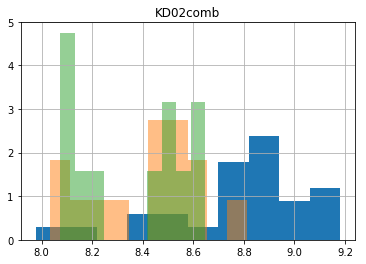

In [29]:
#delete
ax = snIc.hist(normed=1)
snIcBL.hist(alpha=0.5, ax=ax, normed=1)
grb.hist(alpha=0.5, ax=ax, normed=1);

#  8. Calculate the mean metallicity for each of the samples  and its uncertainty

Don't just spit out numbers, but properly write what the numbers are in a well formatted statement


In [30]:
print(" SN Ic metallicity: {:.2f} +/- {:.2f}".format(snIc.mean()[0], 
                                                 snIc.std()[0]))

 SN Ic metallicity: 8.78 +/- 0.29


In [31]:
print(" SN IcBL metallicity: {:.2f} +/- {:.2f}".format(snIcBL.mean()[0], 
                                                 snIcBL.std()[0]))

 SN IcBL metallicity: 8.42 +/- 0.23


In [32]:
print(" SN GRB metallicity: {:.2f} +/- {:.2f}".format(grb.mean()[0], 
                                                 grb.std()[0]))

 SN GRB metallicity: 8.36 +/- 0.22


In [33]:
print(" SN GRB abridged metallicity: {:.2f} +/- {:.2f}".format(
    grbabridged.mean()[0], grbabridged.std()[0]))

 SN GRB abridged metallicity: 8.38 +/- 0.23


# 9 Compare the distribution of Ic and IcBL

Describe the test you are about to run and why you choose it, and state its Null Hypothesis and weather it is rejected or not. 

**Extra Credit** define a function that given the 2 samples runs and interprets the test reporting the result automatically. That way you can use it for all sample comparisons



In [0]:
#delete
alpha = 0.05

In [35]:
grb

,SN,KD02comb
0,GRB980425/SN1998bw,8.485
1,XRF020903,8.183
2,GRB030329/SN2003dh,8.073
3,GRB031203/SN2003lw,8.647
4,GRB/XRF060218/SN2006aj,8.125
5,GRB091127/SN2009nz,8.504
6,GRB100316D/SN2010bh,8.460
7,GRB120422A/SN2012bz,8.545
8,GRB130427A/SN2013cq,8.630
9,GRB130702A/SN2013dx,8.207


In [0]:
#delete
def reject(samp1, samp2, alpha=0.05, verbose=False):
    '''
    runs KS test an stated is NH is rejected.
    '''
    ks = sp.stats.ks_2samp(samp1.KD02comb, samp2.KD02comb)
    if verbose:
        print(ks)
    if ks[1] >= alpha:
        print(
            "We cannot reject the NH that the distributions " + 
            "come from the same parent distributions")
    else :
        print(
        "We reject the NH that the distributions come from the " + 
            "same parent distributions at p-value<{}".format(alpha))    

In [37]:
#delete
import scipy as sp
from scipy import stats
sp.stats.ks_2samp(sneall[sneall.SNtype == "Ic"].KD02comb, 
                     grb.KD02comb)

Ks_2sampResult(statistic=0.7857142857142857, pvalue=2.265676027768393e-05)

In [38]:
reject(snIc, snIcBL, alpha=0.05)

We reject the NH that the distributions come from the same parent distributions at p-value<0.05


# 10 Compare the distribution of Ic and Ic-BL GRB with the full GRB sample


In [39]:
print("Ic vs GRB")
reject(snIc, grb, alpha=0.05)

print("IcBL vs GRB")
reject(snIcBL, grb, alpha=0.05)

Ic vs GRB
We reject the NH that the distributions come from the same parent distributions at p-value<0.05
IcBL vs GRB
We cannot reject the NH that the distributions come from the same parent distributions


# 11. Repeat the comparison of IcBL and GRB with the abridged GRB sample
    


In [40]:
print("Ic vs GRB")
reject(snIc, grbabridged, alpha=0.05)

print("IcBL vs GRB")
reject(snIcBL, grbabridged, alpha=0.05)

Ic vs GRB
We reject the NH that the distributions come from the same parent distributions at p-value<0.05
IcBL vs GRB
We cannot reject the NH that the distributions come from the same parent distributions


   
# Extra Credit. The metallicity measurements include uncertainties which are asymmetric. How would you incorporate them in your analysis (describe what you would do and, of course, if you have time to include this step in the analysis).

Run a MC simulation: